
#### =================================================================================================================================================================
### Milestones 1




Nama : Akbar Fitriawan  
Batch : FTDS-HCK-14  
Tableu : https://public.tableau.com/views/Dasboardgamesales/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

Dataset : VGChartz Games Sales Dataset  
Link : https://www.kaggle.com/datasets/harshsingh2209/vgchartz-games-sales-dataset  

Tentang Dataset: 
> The VGChartz Network is a collection of five video game websites: VGChartz, gamrFeed, gamrReview, gamrTV, and gamrConnect. VGChartz sits at the center of the network and is a video game sales tracking website, providing weekly sales figures of console software and hardware by region. The site was launched in June 2005 and is owned by Brett Walton. VGChartz provides tools for worldwide data analysis and regular reviews of the data it provides.   
tambahan: dataset ini hasil scrapping dari situs VgChartz dan sayang nya tidak ada kolom device game atau console sebagai analisis





#### =================================================================================================================================================================
---

# Analisis Tren Game dan Pendapatan 

### Problem statement : 
> ### Memahami Perubahan Preferensi Pemain dan Implikasinya terhadap Pendapatan Industri Game

### Identifikasi Masalah dengan framework SMART  

- Spesific:  
    Analisis saya akan fokus pada tren permainan dalam industri game dan pendapatan yang terkait dengannya. mengidentifikasi game-game paling populer,  
    menganalisis faktor-faktor yang memengaruhi popularitas game, dan memahami hubungannya dengan pendapatan

- Measurable:  
    Saya akan mengumpulkan data informasi game terpopuler termasuk informasi genre, platform, tanggal rilis, user rating dan pendapatan yang dihasilkan.
    Dengan mengukur hubungan antara faktor-faktor tersebut dan di uji metode statistika

- Achievable:  
    Analisis ini dapat di capai dengan menggunakan data yang mudah diakses seperti kaggel dan menggunakan metode analisis yang teruji. 

-   Relevant:  
    Harapannya analisis ini akan membantu pemula memahami tren dalam industri game dan memberikan wawasan berharga bagi mereka yang ingin terlibat dalam pengembangan game dan pemasaran game

- Time-Bound:  
    saya akan menyelesaikan analisis ini dalam waktu tertentu, misalnya dalam beberapa bulan, untuk memastikan bahwa temuan tersebut dapat di gunakan secara efektif dalam pengambilan keputusan

### Kesimpulan:
Analisis saya berfokus pada tren permainan dan pendapatan dengan mengumpulkan data informasi dari kaggle atau sumber lainnya yang relevan dan valid. Manganalisis game terpopuler dan faktor-faktor yang memengaruhi popularitas game dengan di uji metode statistika. harapanya analisis ini dapat berguna untuk meraka yang ingin terlibat dalam pengembangan game dan pemasaran game. analisis ini akan di selsaikan dalam beberapa bulan untuk memastikan temuan tersebut berguna dalam hal pengembalian keputusan.

### Penjabaran masalah dengan metode 5W + 1H

- Who 
    - Siapa Publisher game yang mendapatkan penjualan game terbaik?

- What 
    - Genre apa yang mendominasi dalam dataset ini?
    - Apakah ada tren tertentu dalam preferensi genre dari waktu ke waktu?
    - Apa Saja Game-Game Populer Dari Beberapa tahun Tahun?

- Where 
    - Dari platform mana game-game ini dirilis? Apakah ada perbedaan tren antara game yang dirilis di platform tertentu?

- When
    - Kapan perilisan game terbanyak

- Why
    - Kenapa game tersebut populer, apakah ada faktor-faktor memengaruhi?
    - Mengapa game-game tertentu menjadi populer? Apakah ada faktor tertentu seperti kualitas gameplay, grafik, atau pemasaran yang berperan dalam popularitasnya?

- How
    - Bagaimana pola pendapatan dari game-game ini? Apakah ada korelasi antara popularitas game dan pendapatannya? Bagaimana distribusi pendapatan antara berbagai game dan genre?
    - bagaimana mengenai rating game menjadi terburuk 
    

---

# Pre-processing Dataset

setup library

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore")
print("The modules are imported")

The modules are imported


# Load Dataset

In [2]:
df = pd.read_csv('finaldata.csv')

df.head()

,name,publisher,vgchartz_score,critic_score,user_score,total_shipped,total_sales,release_date,genre,img_url
0,Legend of Dynamic Goushouden: Houkai no Rondo,Banpresto,7.310415,7.228117,8.086988,5.066328,0.340568,2003-10-24,Role-Playing,https://www.vgchartz.com/games/boxart/full_971...
1,Bundesliga Manager Professional,Software 2000,7.310415,7.228117,8.086988,5.066328,0.340568,1991-01-01,Simulation,https://www.vgchartz.com/games/boxart/1457370c...
2,Luxor,Activision,7.310415,7.228117,8.086988,5.066328,0.340568,2005-03-17,Puzzle,https://www.vgchartz.com/games/boxart/full_747...
3,Sokukoku no Kusabi: Hiiro no Kakera 3 Portable,Idea Factory,7.310415,7.228117,8.086988,5.066328,0.030000,2010-04-15,Adventure,https://www.vgchartz.com/games/boxart/full_476...
4,Vampire Rain: Altered Species,Ignition Entertainment,7.310415,3.500000,8.086988,5.066328,0.060000,2008-09-02,Action,https://www.vgchartz.com/games/boxart/full_824...


# Memahami data


informasi data sebagai berikut:

Judul | Definisi
--- | ---
name | Nama dari game
publisher | ya publisher atau company game 
vgchartz_score | system point atau rating dari situs vgchartz
critic_score | ulasan dan komentar dari pengguna yang bersifat baik dan buruk 
user_score | penilaian langsung dari pengguna
total_shipped | jumlah barang yang terjual atau barang terkirim
total_sales | total penjualan
genre | genre 
img_url | situs gambar tersedia di vgChartz



catatan:  

Datasets ini di dapat hasil dari webscrapping, namun penyedia tidak memberikan informasi detail tentang data tersebut sehingga saya akan manarik kesimpulan berdasarkan opini saya. Ada beberapa data numerik yang mana hasil dari noramalisasi dataset dari penyedia. melihat dari 'total_shipped' , 'total_sales' itu merupakan nilai harga namun di dataset adalah float saya akan atasi di data cleaning.

# Persiapan Data

### Cek informasi data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37715 entries, 0 to 37714
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            37715 non-null  object 
 1   publisher       37715 non-null  object 
 2   vgchartz_score  37715 non-null  float64
 3   critic_score    37715 non-null  float64
 4   user_score      37715 non-null  float64
 5   total_shipped   37715 non-null  float64
 6   total_sales     37715 non-null  float64
 7   release_date    37715 non-null  object 
 8   genre           37715 non-null  object 
 9   img_url         37715 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.9+ MB


catatan:  
    di lihat dari data memiliki baris 37715 dan kolom 10, kolom img tidak diperlukan akan di drop, tipe data numerik akan di ubah menjadi semestinya, float score rangking akan di bulatkan.

In [4]:
print(f'''
baris = {df.shape[0]}
kolom = {df.shape[1]}
''')


baris = 37715
kolom = 10



### Cek informasi missing value

In [5]:
df.isnull().sum()

name              0
publisher         0
vgchartz_score    0
critic_score      0
user_score        0
total_shipped     0
total_sales       0
release_date      0
genre             0
img_url           0
dtype: int64

tidak ada missing value

### Cek data duplikat dan nilai unique

In [6]:
print(f'Data duplikat: {df.duplicated().sum()}')
df.nunique()

Data duplikat: 0


name              36565
publisher          3231
vgchartz_score       74
critic_score         89
user_score           48
total_shipped       661
total_sales         426
release_date       7192
genre                20
img_url           34091
dtype: int64

catatan : 
- 0 Artinya nilai tidak duplikat
- nilai unique sangat banyak
- 3231 company/publisher di data ini
- vgchartz 74 jenis score
- critic_score 89 jenis score
- user_score 48 jenis score
- genre 20 jenis  

kesimpulan data publisher memiliki 3231 data yang mana adalah company. saya akan buat dataframe baru untuk memudahakan analisis


### Drop kolom img

In [7]:
df.drop(columns=['img_url'], axis=1, inplace=True)

### Drop baris Unknown di dataframe

In [8]:
# cek data unknown
df[df['publisher'] == 'Unknown']
# drop data Unknown
df.drop(df[df['publisher'] == 'Unknown'].index,inplace=True)


### Merubah data

In [9]:
# Merubah kolom total_sales dan total_shipped menjadi milions
df['total_sales'] = (df['total_sales'] * 1000000)
df['total_shipped'] = (df['total_shipped'] * 1000000)




In [10]:
# merubah kolom yang bersifat skalar atau rating menjadi bulat
df[['vgchartz_score','critic_score','user_score']] = np.around(df[['vgchartz_score','critic_score','user_score']], 1)

In [11]:
df.head()

,name,publisher,vgchartz_score,critic_score,user_score,total_shipped,total_sales,release_date,genre
0,Legend of Dynamic Goushouden: Houkai no Rondo,Banpresto,7.3,7.2,8.1,5066328.0,340568.42,2003-10-24,Role-Playing
1,Bundesliga Manager Professional,Software 2000,7.3,7.2,8.1,5066328.0,340568.42,1991-01-01,Simulation
2,Luxor,Activision,7.3,7.2,8.1,5066328.0,340568.42,2005-03-17,Puzzle
3,Sokukoku no Kusabi: Hiiro no Kakera 3 Portable,Idea Factory,7.3,7.2,8.1,5066328.0,30000.00,2010-04-15,Adventure
4,Vampire Rain: Altered Species,Ignition Entertainment,7.3,3.5,8.1,5066328.0,60000.00,2008-09-02,Action


In [12]:
# Data tidak normal 2070
df[df['release_date'] == '2070']
# drop data anomali
df.drop(df[df['release_date'] == '2070'].index,inplace=True)
# konversi tipe data
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

### Membuat Dataframe baru

In [13]:
# Membuat dataframe baru dengan nama data untuk memudahkan analisis
top_publishers = df['publisher'].value_counts().head(20).index.tolist()
data = df[df['publisher'].isin(top_publishers)]
data = data.copy()
data.to_csv('Akbar_data.csv',index=False)

In [14]:
data

,name,publisher,vgchartz_score,critic_score,user_score,total_shipped,total_sales,release_date,genre,release_year
2,Luxor,Activision,7.3,7.2,8.1,5066328.0,340568.42,2005-03-17,Puzzle,2005
5,Daikaijyuu Monogatari: Miracle of the Zone II,Hudson Soft,7.3,7.2,8.1,5066328.0,340568.42,1999-03-19,Strategy,1999
7,Akira Psychoball,Atari,7.3,7.2,8.1,5066328.0,340568.42,2002-02-21,Misc,2002
8,QuadTrix,Microsoft,7.3,7.2,8.1,5066328.0,340568.42,2009-05-08,Puzzle,2009
11,Monster Hunter World: Iceborne,Capcom,7.3,7.2,8.1,9700000.0,340568.42,2019-09-06,Role-Playing,2019
...,...,...,...,...,...,...,...,...,...,...
37701,Army of Two: SSC Challenge Map Pack,Electronic Arts,7.3,7.2,8.1,5066328.0,340568.42,2008-04-24,Shooter,2008
37702,Active Life: Magical Carnival,Namco Bandai,7.3,7.2,8.1,5066328.0,50000.00,2011-10-25,Misc,2011
37706,Need for Speed II SE,Electronic Arts,7.3,7.2,8.1,5066328.0,340568.42,1997-01-01,Racing,1997
37710,"Snipperclips Plus: Cut It Out, Together!",Nintendo,7.3,8.2,8.5,5066328.0,120000.00,2017-03-03,Puzzle,2017


In [15]:

# Fungsi untuk menggabungkan nama-nama publisher yang mirip
def group_publisher(publisher):
    publisher_lower = publisher.lower()
    # Contoh: Menggabungkan 'Electronics' dan 'EA Sports' menjadi 'EA'
    if 'microsoft' in publisher_lower:
        return 'Microsoft'
    elif 'sony' in publisher_lower:
        return 'Sony'
    elif 'electronic arts' in publisher_lower or 'ea sports' in publisher_lower:
        return 'EA'
    elif 'bandai' in publisher_lower or 'namco' in publisher_lower:
        return 'Bandai Namco'
    elif 'konami' in publisher_lower:
        return 'Konami'
    elif 'koei' in publisher_lower or 'tecmo' in publisher_lower:
        return 'KOEI'
    elif 'thq' in publisher_lower:
        return 'THQ'
    elif 'square enix' in publisher_lower:
        return 'Square Enix'
    elif 'hudson soft' in publisher_lower:
        return 'Hudson Soft'
    elif 'rockstar games' in publisher_lower:
        return 'Rockstar Games'
    elif 'activision' in publisher_lower:
        return 'Activision'
    elif 'take-two interactive' in publisher_lower:
        return 'Take-Two Interactive'
    elif 'ubisoft' in publisher_lower:
        return 'Ubisoft'
    elif 'sega' in publisher_lower:
        return 'SEGA'
    elif 'nintendo' in publisher_lower:
        return 'Nintendo'
    elif 'atari' in publisher_lower:
        return 'Atari'
    elif 'atlus' in publisher_lower:
        return 'Atlus'
    else:
        return publisher


# apply fungsi ke kolom data group publisher dan tambah kolom 
data['grouped_publisher'] = data['publisher'].apply(group_publisher)

# Analisis Data

#### Memahami Gambaran Data (Statistik descriptive)

In [16]:
# Membuat fungsi aggregate
def func_agg(col):
    return pd.Series({
        'mean': col.mean(),
        'median' : col.median(),
        'std' : col.std(),
        'mode' : col.mode()[0],
        'Skew': col.skew(),
        'kurtosis':col.kurtosis()
    })

##### Cek kolom vgchartz_score

In [17]:
# stat dari kolom vgchartz_score
vg_score = data['vgchartz_score'].agg(func_agg)
vg_score.to_frame().rename(columns={0:'vg_score'})

,vg_score
mean,7.315262
median,7.300000
std,0.332389
mode,7.300000
Skew,-2.325616
kurtosis,53.090974


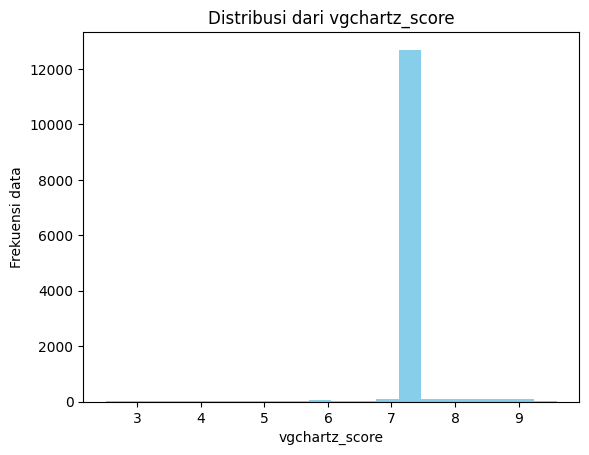

In [18]:
# cek dritribusi data 
plt.hist(data['vgchartz_score'], bins=20, color='skyblue')
plt.xlabel('vgchartz_score')
plt.ylabel('Frekuensi data')
plt.title('Distribusi dari vgchartz_score')
plt.show()

- insight:  
Dilihat dari visualisasi vgchartz score data berfokus ke angka 7.3 dengan tingginya frekuensi


##### cek outlier

In [19]:
q1 = data['vgchartz_score'].quantile(0.25)
q3 = data['vgchartz_score'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data['vgchartz_score'][(data['vgchartz_score']<low_bound) | (data['vgchartz_score']>up_bound)]
no_outlier = data['vgchartz_score'][(data['vgchartz_score']>=low_bound) & (data['vgchartz_score']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["vgchartz_score"]):.2f}%')

Upper Boundary: 7.30
Lower Boundary: 7.30
Percentage of outliers: 5.77%


Catatan kolom vgchartz:
- rata-rata dari vgchartz 7.3
- median dari vgchartz 7.3
- modus dari 7.3 
- std kecil 0.3
- skew negative, highly skew, dan termasuk Symmetrical Distribution
- kurtosis leptokutic indikasi adanya outlier = 5.77%, untuk sekarang kita abaikan karena data cenderung banyak uniknya

#### Cek kolom critic score

In [20]:
# stat dari kolom critic_score 
critic_score = data['critic_score'].agg(func_agg)
critic_score.to_frame().rename(columns={0:'critic_score'})

,critic_score
mean,7.230233
median,7.200000
std,0.569717
mode,7.200000
Skew,-1.349537
kurtosis,16.100940


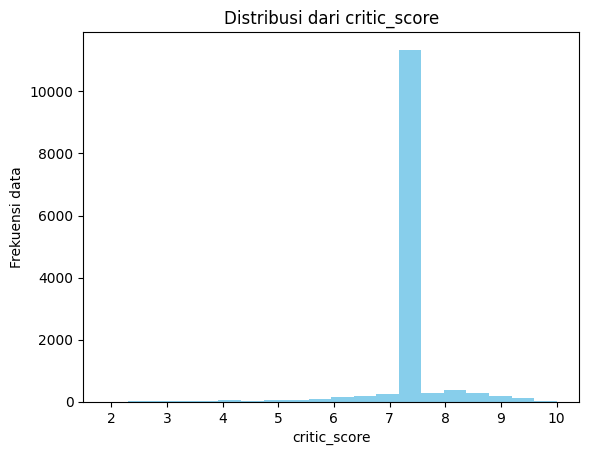

In [21]:
# cek dritribusi data 
plt.hist(data['critic_score'], bins=20, color='skyblue')
plt.xlabel('critic_score')
plt.ylabel('Frekuensi data')
plt.title('Distribusi dari critic_score')
plt.show()

- Insight:
Di visualisasi di atas menunjukan tinggi frekuensi di angka 7.3 dan ada beberapa di angka 8 dengan tinggi sekitar 12000

#### Cek Outlier

In [22]:
q1 = data['critic_score'].quantile(0.25)
q3 = data['critic_score'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data['critic_score'][(data['critic_score']<low_bound) | (data['critic_score']>up_bound)]
no_outlier = data['critic_score'][(data['critic_score']>=low_bound) & (data['critic_score']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["critic_score"]):.2f}%')

Upper Boundary: 7.20
Lower Boundary: 7.20
Percentage of outliers: 17.24%


Catatan kolom critic_score:
- rata-rata dari critic_score 7.2
- median dari critic_score 7.2
- modus dari critic_score 7.2 
- std kecil 0.5
- skew negative, highly skew, dan termasuk Symmetrical Distribution
- kurtosis leptokutic indikasi adanya outlier = 17.24%

#### Cek kolom user_score

In [23]:
# stat dari kolom user_score 
user_score = data['user_score'].agg(func_agg)
user_score.to_frame().rename(columns={0:'user_score'})

,user_score
mean,8.102582
median,8.100000
std,0.143241
mode,8.100000
Skew,-9.370180
kurtosis,476.846210


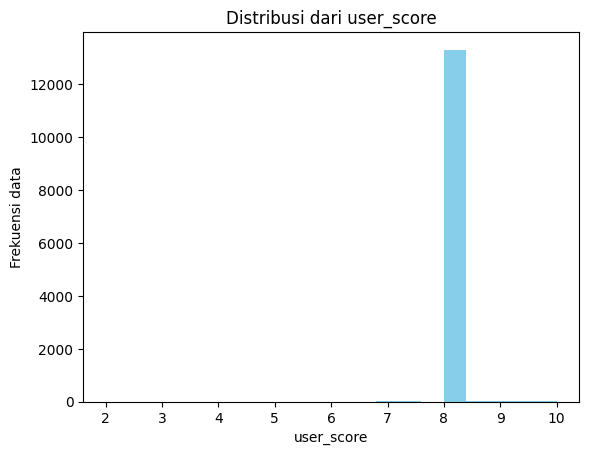

In [24]:
# cek dritribusi data 
plt.hist(data['user_score'], bins=20, color='skyblue')
plt.xlabel('user_score')
plt.ylabel('Frekuensi data')
plt.title('Distribusi dari user_score')
plt.show()

- insight:
dari hasil visualisasi menunjukan data berpusat di angka 8 

#### cek outlier

In [25]:
q1 = data['user_score'].quantile(0.25)
q3 = data['user_score'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data['user_score'][(data['user_score']<low_bound) | (data['user_score']>up_bound)]
no_outlier = data['user_score'][(data['user_score']>=low_bound) & (data['user_score']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["user_score"]):.2f}%')

Upper Boundary: 8.10
Lower Boundary: 8.10
Percentage of outliers: 1.15%


Catatan kolom user_score:
- rata-rata dari user_score 8.1
- median dari user_score 8.1
- modus dari user_score 8.1 
- std kecil 0.1
- skew negative, highly skew, dan termasuk Symmetrical Distribution
- kurtosis leptokutic indikasi adanya outlier = 1.15%

#### Cek kolom total shipped

In [26]:
# stat dari kolom total_shipped 
total_shipped = data['total_shipped'].agg(func_agg)
total_shipped.to_frame().rename(columns={0:'total_shipped'})

,total_shipped
mean,5.307954e+06
median,5.066328e+06
std,9.146573e+06
mode,5.066328e+06
Skew,3.786378e+01
kurtosis,1.698454e+03


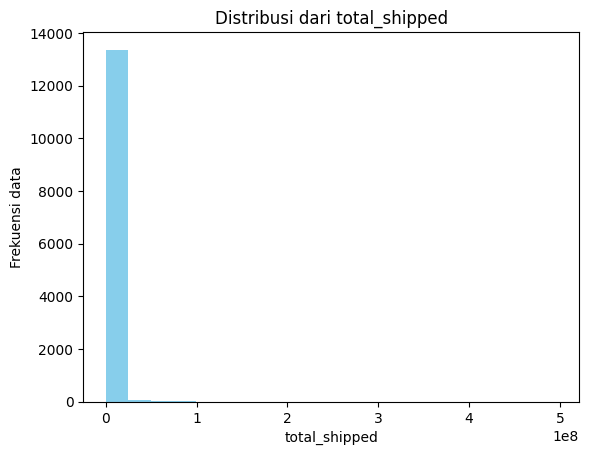

In [27]:
# cek dritribusi data 
plt.hist(data['total_shipped'], bins=20, color='skyblue')
plt.xlabel('total_shipped')
plt.ylabel('Frekuensi data')
plt.title('Distribusi dari total_shipped')
plt.show()

#### Cek Outlier

In [28]:
q1 = data['total_shipped'].quantile(0.25)
q3 = data['total_shipped'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data['total_shipped'][(data['total_shipped']<low_bound) | (data['total_shipped']>up_bound)]
no_outlier = data['total_shipped'][(data['total_shipped']>=low_bound) & (data['total_shipped']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["total_shipped"]):.2f}%')

Upper Boundary: 5066328.00
Lower Boundary: 5066328.00
Percentage of outliers: 9.61%


Catatan kolom total shipped:
- rata-rata dari total shipped 530,7954
- median dari total shipped 506,6328
- modus dari total shipped 506,6328
- std cukup besar 9.146573
- skew positive, highly skew mengarah ke kanan
- kurtosis leptokutic indikasi adanya outlier = 9.61%

### Cek kolom total sales

In [29]:
# stat dari kolom total sales
total_sales = data['total_sales'].agg(func_agg)
total_sales.to_frame().rename(columns={0:'total_sales'})

,total_sales
mean,394152.255404
median,340568.420000
std,587094.243533
mode,340568.420000
Skew,10.206423
kurtosis,164.906318


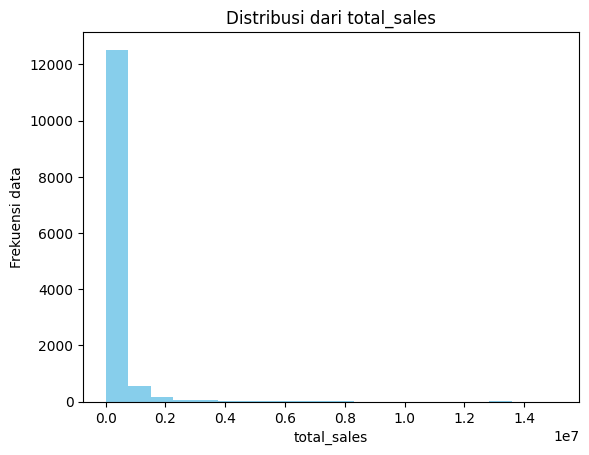

In [30]:
# cek dritribusi data 
plt.hist(data['total_sales'], bins=20, color='skyblue')
plt.xlabel('total_sales')
plt.ylabel('Frekuensi data')
plt.title('Distribusi dari total_sales')
plt.show()

#### Cek outlier

In [31]:
q1 = data['total_sales'].quantile(0.25)
q3 = data['total_sales'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data['total_sales'][(data['total_sales']<low_bound) | (data['total_sales']>up_bound)]
no_outlier = data['total_sales'][(data['total_sales']>=low_bound) & (data['total_sales']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(data["total_sales"]):.2f}%')

Upper Boundary: 461421.05
Lower Boundary: 139147.37
Percentage of outliers: 28.91%


Catatan kolom total sales:
- rata-rata dari total shipped 394,152
- median dari total shipped 340,568
- modus dari total shipped 340,568
- std besar 587,094
- skew positive, highly skew mengarah ke kanan
- kurtosis leptokutic indikasi adanya outlier = 28.91%

cek stat

In [32]:
data.head()

,name,publisher,vgchartz_score,critic_score,user_score,total_shipped,total_sales,release_date,genre,release_year,grouped_publisher
2,Luxor,Activision,7.3,7.2,8.1,5066328.0,340568.42,2005-03-17,Puzzle,2005,Activision
5,Daikaijyuu Monogatari: Miracle of the Zone II,Hudson Soft,7.3,7.2,8.1,5066328.0,340568.42,1999-03-19,Strategy,1999,Hudson Soft
7,Akira Psychoball,Atari,7.3,7.2,8.1,5066328.0,340568.42,2002-02-21,Misc,2002,Atari
8,QuadTrix,Microsoft,7.3,7.2,8.1,5066328.0,340568.42,2009-05-08,Puzzle,2009,Microsoft
11,Monster Hunter World: Iceborne,Capcom,7.3,7.2,8.1,9700000.0,340568.42,2019-09-06,Role-Playing,2019,Capcom


# Comapany/Publisher mana yang memiliki kinerja penjualan terbaik?

- Rata-rata penjualan

In [33]:
# rata-rata penjualan terbaik top 5
company_sales = data.groupby('grouped_publisher')['total_sales'].mean().sort_values(ascending=False).head(5)
company_sales = company_sales.reset_index()

company_sales

,grouped_publisher,total_sales
0,EA,685098.046985
1,Activision,683824.153750
2,Sony,458333.561203
3,THQ,455537.885097
4,Ubisoft,427309.353705


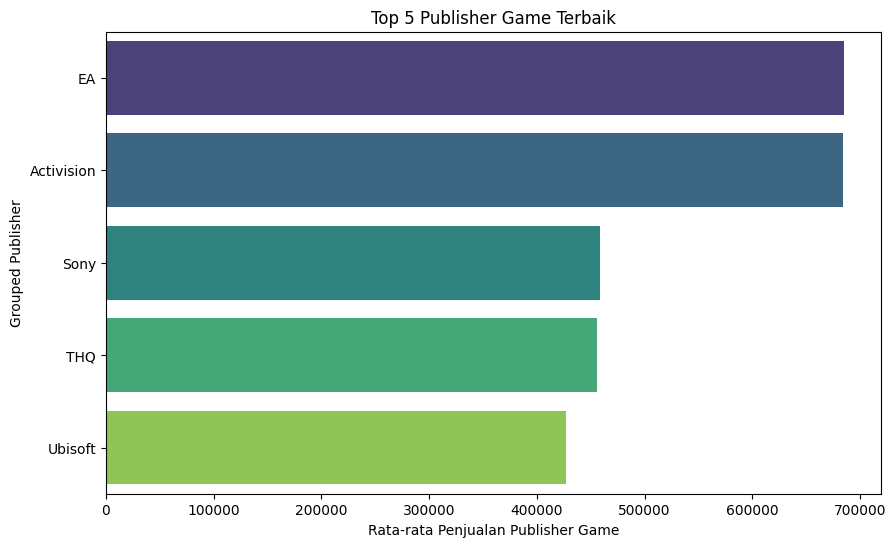

In [34]:
# Barplot Top 5 Publisher game 
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='grouped_publisher', data=company_sales, palette='viridis')
plt.xlabel('Rata-rata Penjualan Publisher Game')
plt.ylabel('Grouped Publisher')
plt.title('Top 5 Publisher Game Terbaik')
plt.show()

## Insight:  
Oke dari sini kita tau bahwa jumlah penjualan terbanyak berdasarkan rata-rata publisher.  
- pertama Electrinics arts $685,098.04
- kedua Activision 	$683,824.15
- ketiga Sony $458,333.56
- keempat THQ $	455,537.88
- keliama $427,309.35

#  Genre apa yang mendominasi dalam dataset ini?

In [35]:
# genre distribusi
genre_group = data['genre'].value_counts()

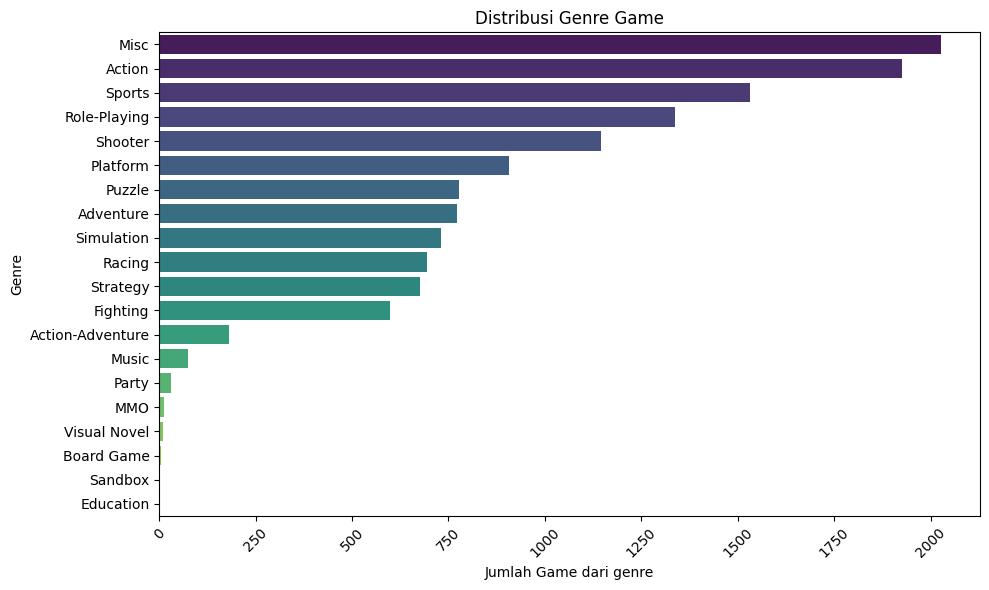

In [36]:
# seaborn plot barH
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_group.values, y=genre_group.index, orient='horizontal',palette='viridis')

plt.title('Distribusi Genre Game')

plt.xlabel('Jumlah Game dari genre')
plt.ylabel('Genre')

plt.xticks(rotation=45)
plt.tight_layout()
# Menampilkan plot
plt.show()


### Insight:
genre yang mendominasi di data set ini adalah MISC

# Apakah ada tren tertentu dalam preferensi genre dari waktu ke waktu?

In [37]:
# hitung frekuensi masing-masing genre untuk setiap tahun
genre_trend = data.groupby(['release_year', 'genre']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
genre_trend

,release_year,genre,counts
358,2009,Misc,398
354,2009,Action,212
362,2009,Puzzle,203
344,2008,Misc,179
374,2010,Misc,178
...,...,...,...
188,1997,Action-Adventure,1
151,1994,Action-Adventure,1
116,1991,Fighting,1
114,1991,Action-Adventure,1


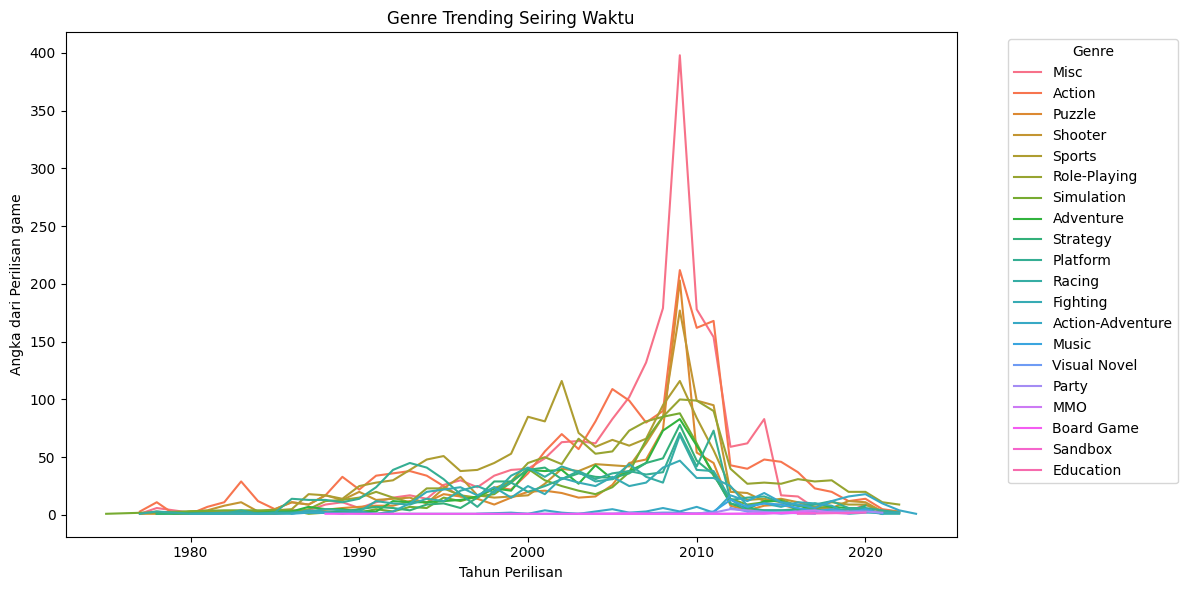

In [38]:
# plot data trend genre dari waktu ke waktu pakai Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend, x='release_year', y='counts', hue='genre')
plt.xlabel('Tahun Perilisan')
plt.ylabel('Angka dari Perilisan game')
plt.title("Genre Trending Seiring Waktu")
plt.legend(title='Genre', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

### Insight: 
Bisa dilihat bahwa ada trend di tahun 2009 dengan tiga genre yang mendominasi yaitu Misc, Action, dan Puzzle. 

# Apa Saja Game-Game Populer Dari Beberapa tahun Tahun?

In [39]:
# filter game sebemlum tahun 2000-an
game_sebelum_2000an = data[data['release_year'] < 2000]
game_sebelum_2000an = game_sebelum_2000an.groupby(['name', 'release_year'])['total_sales'].sum().sort_values( ascending=False).head(5)
game_sebelum_2000an = game_sebelum_2000an.reset_index()
game_sebelum_2000an

,name,release_year,total_sales
0,Tekken 2,1996,5740000.0
1,Tony Hawk's Pro Skater,1999,5020000.0
2,Crash Team Racing,1999,4790000.0
3,Asteroids,1981,4310000.0
4,Namco Museum Vol.3,1997,4050000.0


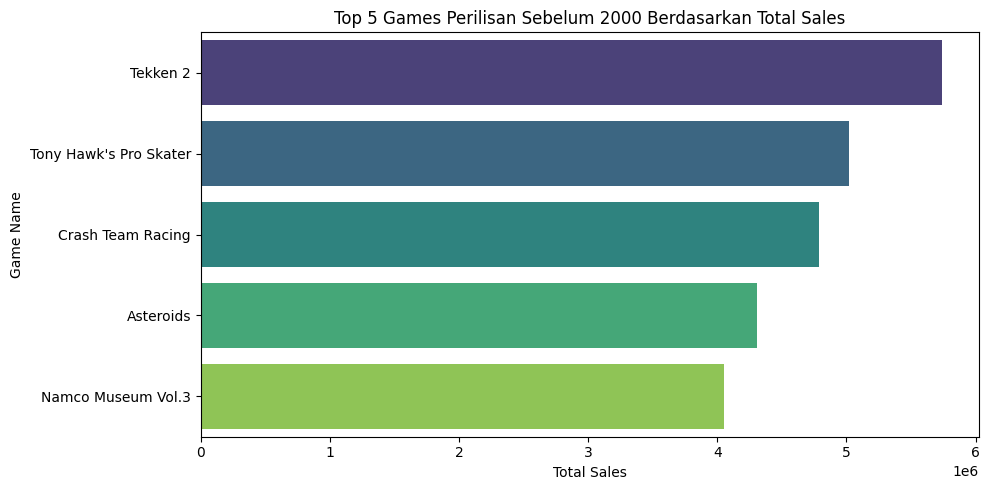

In [40]:
# Buat horizontal barplot menggunakan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='total_sales', y='name', data=game_sebelum_2000an, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Game Name')
plt.title('Top 5 Games Perilisan Sebelum 2000 Berdasarkan Total Sales')
plt.tight_layout()  
plt.show()

# Insight:  
Dari data di atas merupakan 5 game terata sebelum tahun 2000 yaitu Takken 2 = $574,000.00, Tony Hawk's Pro Skater = $502,0000.0, Crash Team Racing = $479,0000.0, Asteroids = $431,0000,
dan Namco Museum Vol.3 = $405,000.0


In [41]:
# filter game di dekade 2010
game_di_dekade_2010 = data[(data['release_year'] > 2000 ) & (data['release_year'] < 2010)]
game_di_dekade_2010 = game_di_dekade_2010.groupby(['name', 'release_year'])['total_sales'].sum().sort_values( ascending=False).head(5)
game_di_dekade_2010 = game_di_dekade_2010.reset_index()

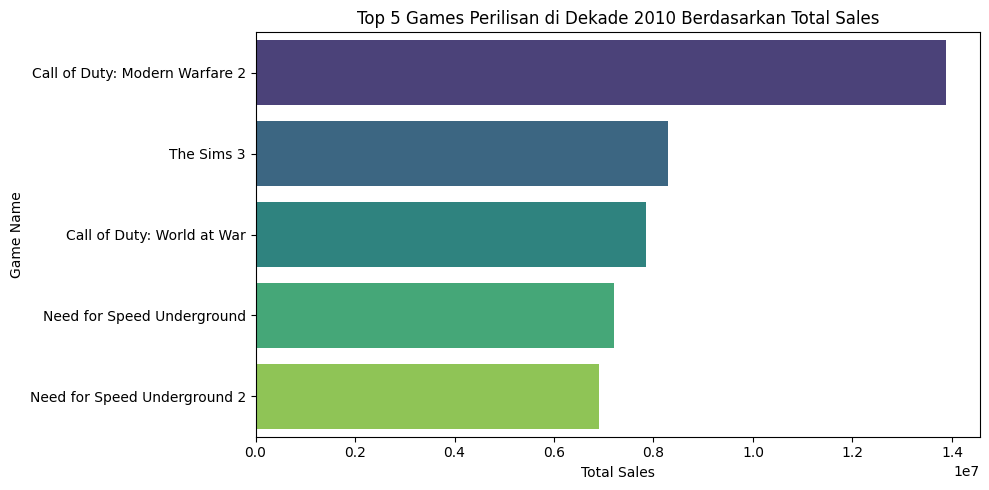

In [42]:
# Buat horizontal barplot menggunakan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='total_sales', y='name', data=game_di_dekade_2010, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Game Name')
plt.title('Top 5 Games Perilisan di Dekade 2010 Berdasarkan Total Sales')
plt.tight_layout()  
plt.show()

# insight:  
Dari data di atas bahwa 5 Game teratas pada dekade 2010 adalah Call of Duty: Modern Warfare 2 = $138,705.68, The Sims 3	= $830,056.8, Call of Duty: World at War = $784,056.8,Need for Speed Underground = $720,000.0 , dan Need for Speed Underground 2 = $690,000.0

In [43]:
# filter game di dekade 2020
game_di_dekade_2020 = data[(data['release_year'] > 2010 ) & (data['release_year'] < 2022)]
game_di_dekade_2020 = game_di_dekade_2020.groupby(['name', 'release_year'])['total_sales'].sum().sort_values( ascending=False).head(5)
game_di_dekade_2020 = game_di_dekade_2020.reset_index()
game_di_dekade_2020

,name,release_year,total_sales
0,Call of Duty: WWII,2017,19630000.00
1,Call of Duty: Black Ops 3,2015,15090000.00
2,Call of Duty: Black Ops II,2012,14200568.42
3,Call of Duty: Modern Warfare 3,2011,13690568.42
4,FIFA 17,2016,10940000.00


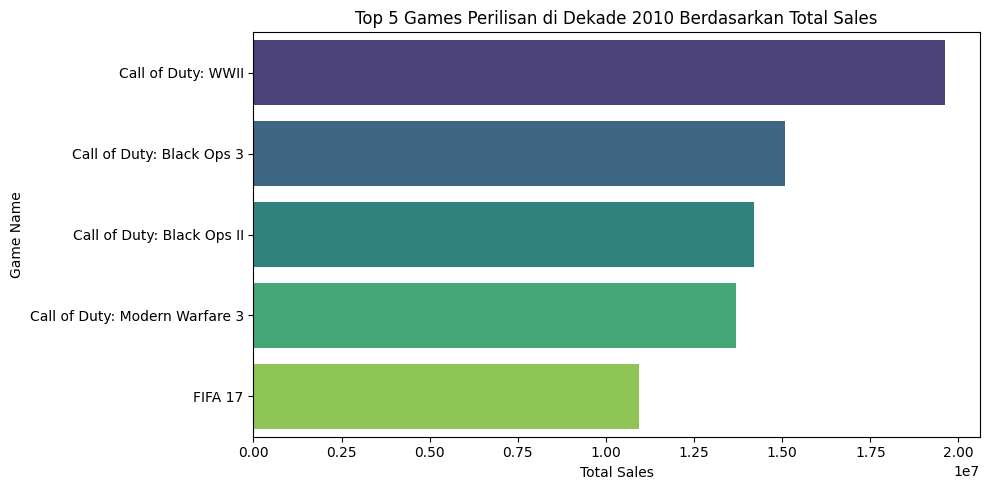

In [44]:
# Buat horizontal barplot menggunakan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='total_sales', y='name', data=game_di_dekade_2020, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Game Name')
plt.title('Top 5 Games Perilisan di Dekade 2010 Berdasarkan Total Sales')
plt.tight_layout()  
plt.show()

# Insight
Dari data di atas game terpopuler 5 teratas adalah Call of Duty: WWII = $196,300.00, Call of Duty: Black Ops 3 = $150,900.00., Call of Duty: Black Ops II = $142,005.68, Call of Duty: Modern Warfare 3	= $136,905.68, dan FIFA 17 $109,400.00	  call of duty selalu di sebut di dataset ini.

# Statistika Inferential

### Pokok Yang diuji:

- #### Mengapa game-game tertentu menjadi populer? Apakah ada faktor tertentu seperti kualitas gameplay, grafik, atau pemasaran yang berperan dalam popularitasnya?
- #### Bagaimana pola pendapatan dari game-game ini? Apakah ada korelasi antara popularitas game dan pendapatannya?

---

### Mengapa game-game tertentu menjadi populer?

Problem: Faktor Populeritas Game, disini saya akan mencoba apakah ada korelasi antara popularitas game dengan rating score

H0 = Ya ada kolerasi sehingga berdampak pada indutri game  
H1 = Tidak ada kolerasi sehingga ada faktor lain selain rating  

Method :
- Pearson dan ploting


In [45]:
# penyiapan data
data_uji = data[['critic_score', 'user_score','total_sales']]


# Menghitung koefisien korelasi Pearson dan p-value antara skor kritik/pengguna dan total penjualan
critic_corr, critic_p_value = stats.pearsonr(data_uji['critic_score'], data_uji['total_sales'])
user_corr, user_p_value = stats.pearsonr(data_uji['user_score'], data_uji['total_sales'])

print("Koefisien Korelasi antara score_critic dan Total Penjualan:", critic_corr)
print("P-value antara score_critic dan Total Penjualan:", critic_p_value)
print("Koefisien Korelasi antara user_score dan Total Penjualan:", user_corr)
print("P-value antara user_score dan Total Penjualan:", user_p_value)

Koefisien Korelasi antara score_critic dan Total Penjualan: 0.159062742579626
P-value antara score_critic dan Total Penjualan: 7.272766614640955e-77
Koefisien Korelasi antara user_score dan Total Penjualan: 0.03415502836542087
P-value antara user_score dan Total Penjualan: 7.48660594066253e-05


### Insight :
### critic_score
- Koefisien korelasi antara skor kritik dan total penjualan adalah 0.159,  ada korelasi positif antara skor kritik dan total penjualan. Namun, korelasinya tidak terlalu kuat.
- Nilai p-value yang sangat kecil (lebih kecil dari ambang batas signifikansi 0.05) menunjukkan bahwa hubungan ini sangat signifikan secara statistik. Dengan demikian, kita dapat menolak hipotesis nol bahwa tidak ada korelasi antara skor kritik dan total penjualan.

### user_score
- Koefisien korelasi antara skor pengguna dan total penjualan adalah 0.034,  korelasi positif antara skor pengguna dan total penjualan. Namun, korelasinya sangat lemah.
- Nilai p-value yang sangat kecil (lebih kecil dari ambang batas signifikansi 0.05) menunjukkan bahwa hubungan ini juga sangat signifikan secara statistik.

#### Dari dua kesimpulan menolak H0 

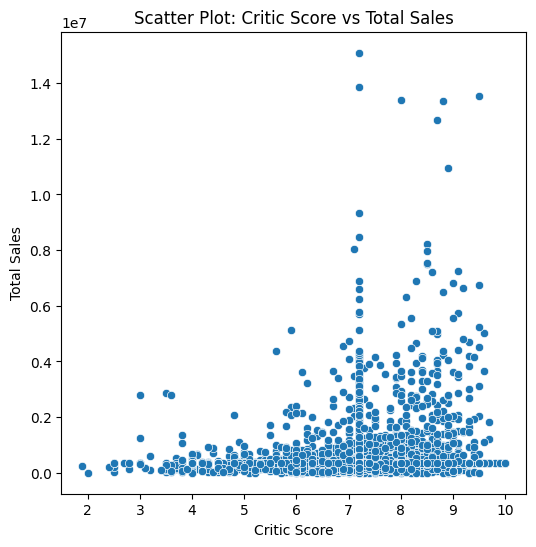

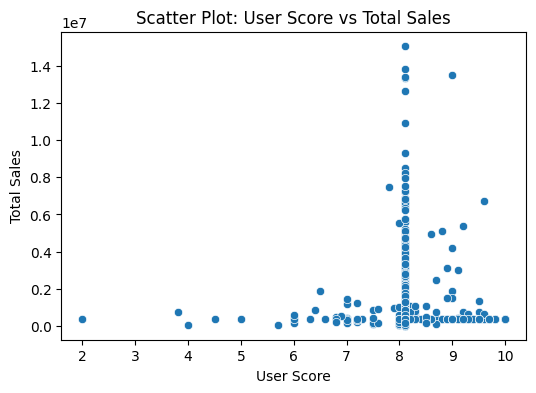

In [46]:
# Plotting scatter plot antara skor kritik dan total penjualan
plt.figure(figsize=(6, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_uji)
plt.title('Scatter Plot: Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Menyimpan gambar
plt.savefig('critic_score_sales_scatter.png')
plt.show()

# Plotting scatter plot antara skor pengguna dan total penjualan
plt.figure(figsize=(6, 4))
sns.scatterplot(x='user_score', y='total_sales', data=data_uji)
plt.title('Scatter Plot: User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

# Menyimpan gambar
plt.savefig('user_score_sales_scatter.png')
plt.show()

### insight
Dari data di atas menunjukan critic score cukup padat sehingga ada kolerasi namun rendah, untuk user score tidak ada korelasi sama sekali jadi dari sini bisa di katakan H0 di tolak

### Bagaimana pola pendapatan dari game-game ini?,Apakah ada korelasi antara popularitas game dan pendapatannya?

Problem: Pola Pendapatan,  uji korelasi untuk melihat apakah ada hubungan antara popularitas game (dalam hal total penjualan) dan pendapatan yang dihasilkan.

H0 : Adanya korelasi
H1 : tidak ada korelasi

method : 
Hitung koefisien korelasi Pearson antara "total_sales" dan "total_shipped".

In [47]:
# penyiapan data
data_uji_2 = data[['total_sales', 'total_shipped']]

# Melakukan uji korelasi
correlation_coefficient, p_value = stats.pearsonr(data_uji_2['total_sales'], data_uji_2['total_shipped'])

print("Koefisien Korelasi Pearson:", correlation_coefficient)
print("P-value:", p_value)

Koefisien Korelasi Pearson: -0.0024112562119689472
P-value: 0.7798585419948004


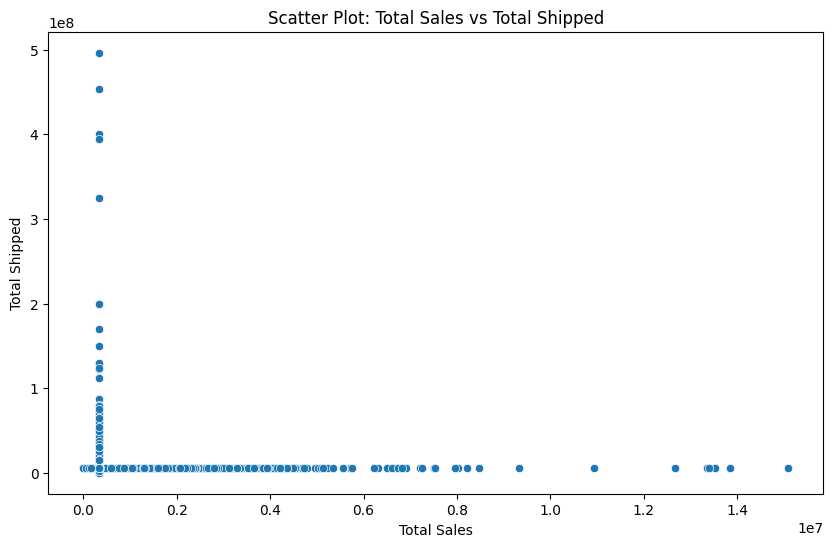

In [48]:
# Plotting scatter plot antara total penjualan dan total pengiriman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sales', y='total_shipped', data=data_uji_2)
plt.title('Scatter Plot: Total Sales vs Total Shipped')
plt.xlabel('Total Sales')
plt.ylabel('Total Shipped')

# Menyimpan gambar
plt.savefig('total_sales_total_shipped_scatter.png')
plt.show()

### insight 
- Koefisien korelasi antara total penjualan dan total pengiriman adalah -0.002. Korelasi yang mendekati nol menunjukkan bahwa perubahan dalam satu variabel tidak secara konsisten berkorelasi dengan perubahan dalam variabel lainnya.
-  Nilai p-value adalah 0.780. menolak hipotesis nol bahwa tidak ada korelasi antara total penjualan dan total pengiriman.

### kesimpulan H0 ditolak

---

# Kesimpulan

- Comapany/Publisher mana yang memiliki kinerja penjualan terbaik?
- Genre apa yang mendominasi dalam dataset ini?
- Apakah ada tren tertentu dalam preferensi genre dari waktu ke waktu?
- Apa Saja Game-Game Populer Dari Beberapa tahun Tahun?
- Mengapa game-game tertentu menjadi populer?
- Bagaimana pola pendapatan dari game-game ini?

## Jawab:
- pertama Electrinics arts = $685,098.04, kedua Activision = $683,824.15, ketiga Sony = $458,333.56 ,keempat THQ = $455,537.88, keliama = $427,309.35
- genre yang mendominasi di data set ini adalah MISC
- trend di tahun 2009 dengan tiga genre yang mendominasi yaitu Misc, Action, dan Puzzle.
-   - Dari data di atas merupakan 5 game terata sebelum tahun 2000:
        - Takken 2 = $574,000.00, Tony Hawk's
        - Pro Skater = $502,0000.0, 
        - Crash Team Racing = $479,0000.0,
        - Asteroids = $431,0000,
        - Namco Museum Vol.3 = $405,000.0
    - 5 Game teratas pada dekade 2010 adalah:
        - Call of Duty: Modern Warfare 2 = $138,705.68, 
        - The Sims 3 = $830,056.8, 
        - Call of Duty: World at War = $784,056.8,
        - Need for Speed Underground = $720,000.0 
        - Need for Speed Underground 2 = $690,000.0
    - 5 teratas di tahun 2020an adalah Call of Duty: WWII = $196,300.00, Call of Duty: Black Ops 3 = $150,900.00., Call of Duty: Black Ops II = $142,005.68, Call of Duty: Modern Warfare 3	= $136,905.68, dan FIFA 17 $109,400.00. call of duty selalu di sebut di dataset ini.
- Faktor Populeritas Game. telah di uji dan H0 di tolak yaitu menguji korelasi antara critic score, user score dan total sales
- Pola Pendapatan. Tidak ada korelasi diantara pendapatan dengan sales